In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_rect_corners(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply edge detection
    edges = cv2.Canny(gray, 50, 120, apertureSize=3)
    # Detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=40, minLineLength=85, maxLineGap=180)
    # Draw lines only on a blank image
    img_with_lines_only = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img_with_lines_only, (x1, y1), (x2, y2), (255, 255, 255), 2)  # White lines
    # Find contours
    gray_lines_only = cv2.cvtColor(img_with_lines_only, cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(gray_lines_only, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Iterate through each contour
    corners = []
    for contour in contours:
        # Approximate the contour to a polygon with less vertices
        epsilon = 0.1 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        # If the approximated polygon has 4 vertices (i.e., it's a rectangle)
        if len(approx) == 4:
            # Extract the coordinates of the four corners
            corners.extend([tuple(point[0]) for point in approx])
    return corners

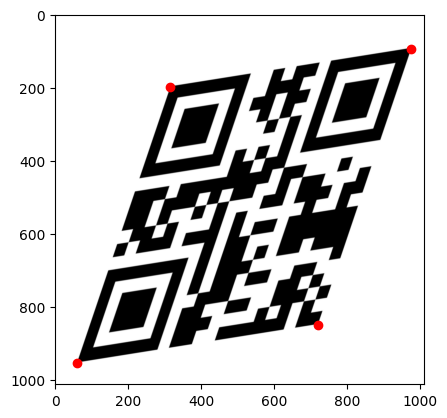

In [33]:
# Example usage:
image_path = '06-Railfence-cipher.png'
rect_corners = find_rect_corners(image_path)

# Load the image again to plot the circles
img = cv2.imread(image_path)

# Plot the image with circles at the corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for corner in rect_corners:
    plt.plot(corner[0], corner[1], 'ro')  # Red circles
plt.show()